In [13]:
from tratamento_module import *
from modelos_module import *
import numpy as np
import pandas as pd
import warnings
import importlib
from IPython.lib.deepreload import reload
from sklearn.metrics import plot_confusion_matrix
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
warnings.filterwarnings("ignore")

tratamento = Tratamento()

In [6]:
amostras = tratamento.amostras_import()


IMPORTANDO AS AMOSTRAS 

In [10]:
amostras.head()

Wavelength,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,...,1364.0,1365.0,1366.0,1367.0,1368.0,1369.0,1370.0,1371.0,1372.0,Diagnostico
A3791_e,0.023225,0.023256,0.023233,0.022841,0.020918,0.020383,0.020697,0.020925,0.020588,0.020506,...,0.005530,0.005461,0.005387,0.005297,0.005223,0.005154,0.005089,0.005030,0.004977,Positivo
A3792_e,0.011012,0.009415,0.009336,0.010466,0.010308,0.009649,0.009095,0.008971,0.009065,0.009404,...,0.002891,0.002791,0.002685,0.002567,0.002467,0.002370,0.002278,0.002197,0.002121,Positivo
A3793_e,0.022587,0.022717,0.022223,0.020916,0.019812,0.018976,0.018413,0.017999,0.017348,0.017177,...,0.004460,0.004216,0.003982,0.003744,0.003521,0.003313,0.003111,0.002912,0.002729,Positivo
A3797_e,0.028283,0.026276,0.025200,0.025143,0.023914,0.023573,0.023126,0.021963,0.021399,0.020641,...,0.003192,0.003058,0.002933,0.002817,0.002703,0.002600,0.002496,0.002390,0.002304,Positivo
A3798_e,0.024692,0.023229,0.022823,0.022822,0.021488,0.020784,0.020383,0.019904,0.019754,0.019565,...,0.004339,0.004128,0.003919,0.003715,0.003523,0.003337,0.003151,0.002971,0.002806,Positivo


SELECIONANDO OS VALORES DE REFLECTÂNCIA DE APENAS ALGUMAS FREQUÊNCIAS

In [7]:
amostra_freq = tratamento.get_frequencies(amostras=amostras,freq=[900.0,1000.0,1100.0,'Diagnostico'])        



In [45]:
amostra_freq.shape

(365, 4)

SEPARANDO AS AMOSTRAS EM TREINAMENTO E TESTE

In [19]:
X,y = Tratamento.get_samples(Tratamento,amostras=amostra_freq)
X_train,X_test,y_train,y_teste = Tratamento.training_test(Tratamento)

In [28]:
X_test.head()

Wavelength,900.0,1000.0,1100.0
A3168_e,0.422121,0.314203,0.327425
A2548,0.429617,0.251919,0.138351
A3244_c,0.354856,0.247393,0.179036
A2792,0.133492,0.077284,0.061328
A3785_c,0.597544,0.391515,0.426199


In [20]:
modelos = Modelos()

TREINANDO MODELO SVM

In [23]:
clf_svm = modelos.SVM(X_train,y_train)

In [26]:
y_teste.shape

(37,)

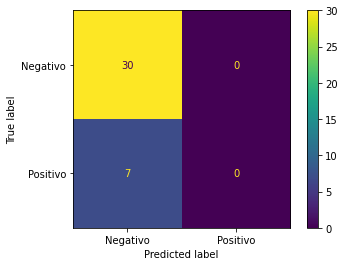

In [24]:
plot_confusion_matrix(clf_svm,X_test,y_teste,display_labels=['Negativo','Positivo'])

TREINANDO MODELO NN

In [83]:
nn = Modelos.NN(Modelos,X_train,y_train)

In [84]:
y_predict = nn.predict(X_test.to_numpy())
y_predict_1 =  np.where(y_predict  > 0.5, 1, 0)

In [94]:
print(y_predict[0:5])

[[0.4831077 ]
 [0.500621  ]
 [0.49625027]
 [0.5115009 ]
 [0.47208115]]


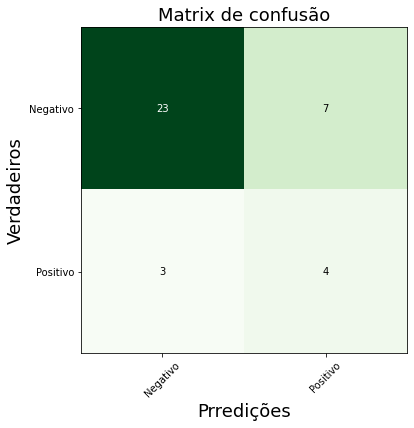

In [96]:
Tratamento.confusion(Tratamento,y_teste.astype(int),y_predict_1)